In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [294]:
plt.style.use('seaborn')
sns.set()
name='512'

In [295]:
data_s = pd.read_csv('sol12_m_4obj_'+name+'.txt.csv', sep=';', header=None)
data_ns = pd.read_csv('sol12_m_4obj_'+name+'_ns.txt.csv', sep=';', header=None)
data_s1 = pd.read_csv('sol_m_4obj_'+name+'.txt.csv', sep=';', header=None)
data_ns1 = pd.read_csv('sol_m_4obj_'+name+'_ns.txt.csv', sep=';', header=None)
data_s2 = pd.read_csv('sol1_m_4obj_'+name+'.txt.csv', sep=';', header=None)
data_ns2 = pd.read_csv('sol1_m_4obj_'+name+'_ns.txt.csv', sep=';', header=None)

In [296]:
data_s.columns = ['col_{}'.format(idx) for idx in range(1, len(data_s.columns) + 1)]
data_ns.columns = ['col_{}'.format(idx) for idx in range(1, len(data_ns.columns) + 1)]
data_s1.columns = ['col_{}'.format(idx) for idx in range(1, len(data_s1.columns) + 1)]
data_ns1.columns = ['col_{}'.format(idx) for idx in range(1, len(data_ns1.columns) + 1)]
data_s2.columns = ['col_{}'.format(idx) for idx in range(1, len(data_s2.columns) + 1)]
data_ns2.columns = ['col_{}'.format(idx) for idx in range(1, len(data_ns2.columns) + 1)]

In [297]:
s = data_s.append(data_s1).sort_values('col_2',ascending=False)
ns=data_ns.append(data_ns1).sort_values('col_2',ascending=False)
s1 = s.append(data_s2).sort_values('col_2',ascending=False)
ns1=ns.append(data_ns2).sort_values('col_2',ascending=False)
prop_s = s1.groupby('col_1')['col_2'].agg(['mean', 'count']).groupby('mean').mean().reset_index()
prop_ns = ns1.groupby('col_1')['col_2'].agg(['mean', 'count']).groupby('mean').mean().reset_index()

In [298]:
prop_s.columns = ['time_elapsed', 'average_sol']
prop_ns.columns = ['time_elapsed', 'average_sol']


In [299]:

for i in range(len(prop_s)-1): 
     if prop_s.loc[i+1,"time_elapsed"]-prop_s.loc[i,"time_elapsed"]<5:
        prop_s.loc[i+1,"time_elapsed"]=prop_s.loc[i,"time_elapsed"]  
for i in range(len(prop_ns)-1): 
     if prop_ns.loc[i+1,"time_elapsed"]-prop_ns.loc[i,"time_elapsed"]<5:
        prop_ns.loc[i+1,"time_elapsed"]=prop_ns.loc[i,"time_elapsed"]   
        


In [300]:
prop_s = prop_s.groupby('time_elapsed')['average_sol'].agg('mean').reset_index()
prop_ns = prop_ns.groupby('time_elapsed')['average_sol'].agg('mean').reset_index()

prop_s.to_csv("G3_"+name+"consinerg.csv",index=None,header=['time_elapsed', 'average_sol'])
prop_ns.to_csv("G3_"+name+"nosinerg.csv",index=None,header=['time_elapsed', 'average_sol'])

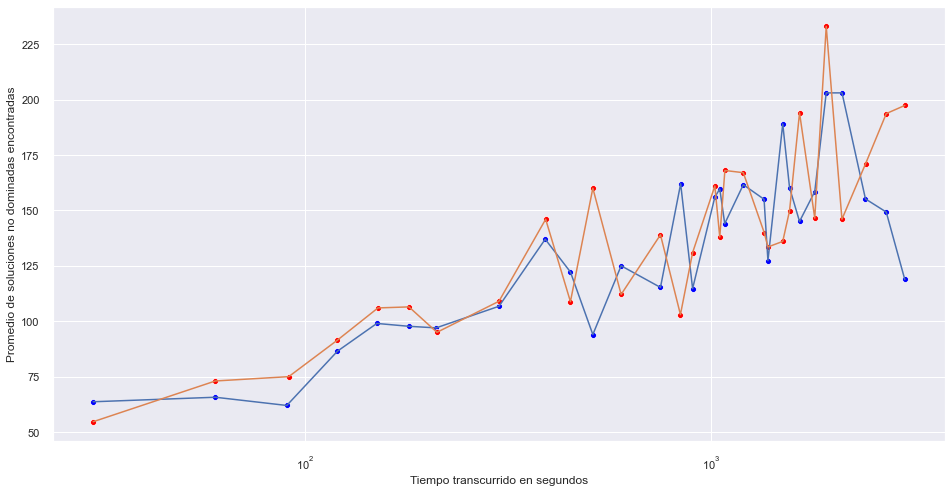

In [301]:
fig, ax = plt.subplots(figsize=(16, 8))
g = sns.lineplot(x='time_elapsed', y='average_sol', data=prop_s, markers=True)
_ = sns.scatterplot(x='time_elapsed', y='average_sol', data=prop_s, color='blue', markers='+')
h = sns.lineplot(x='time_elapsed', y='average_sol', data=prop_ns, markers=True)
plt.xscale('log')
a = sns.scatterplot(x='time_elapsed', y='average_sol', data=prop_ns, color='red', markers='+')
h.set_xlabel('Tiempo transcurrido en segundos')
a = g.set_ylabel('Promedio de soluciones no dominadas encontradas')
